In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_excel("C:/Users/tavin/Desktop/winequality-white.xlsx")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


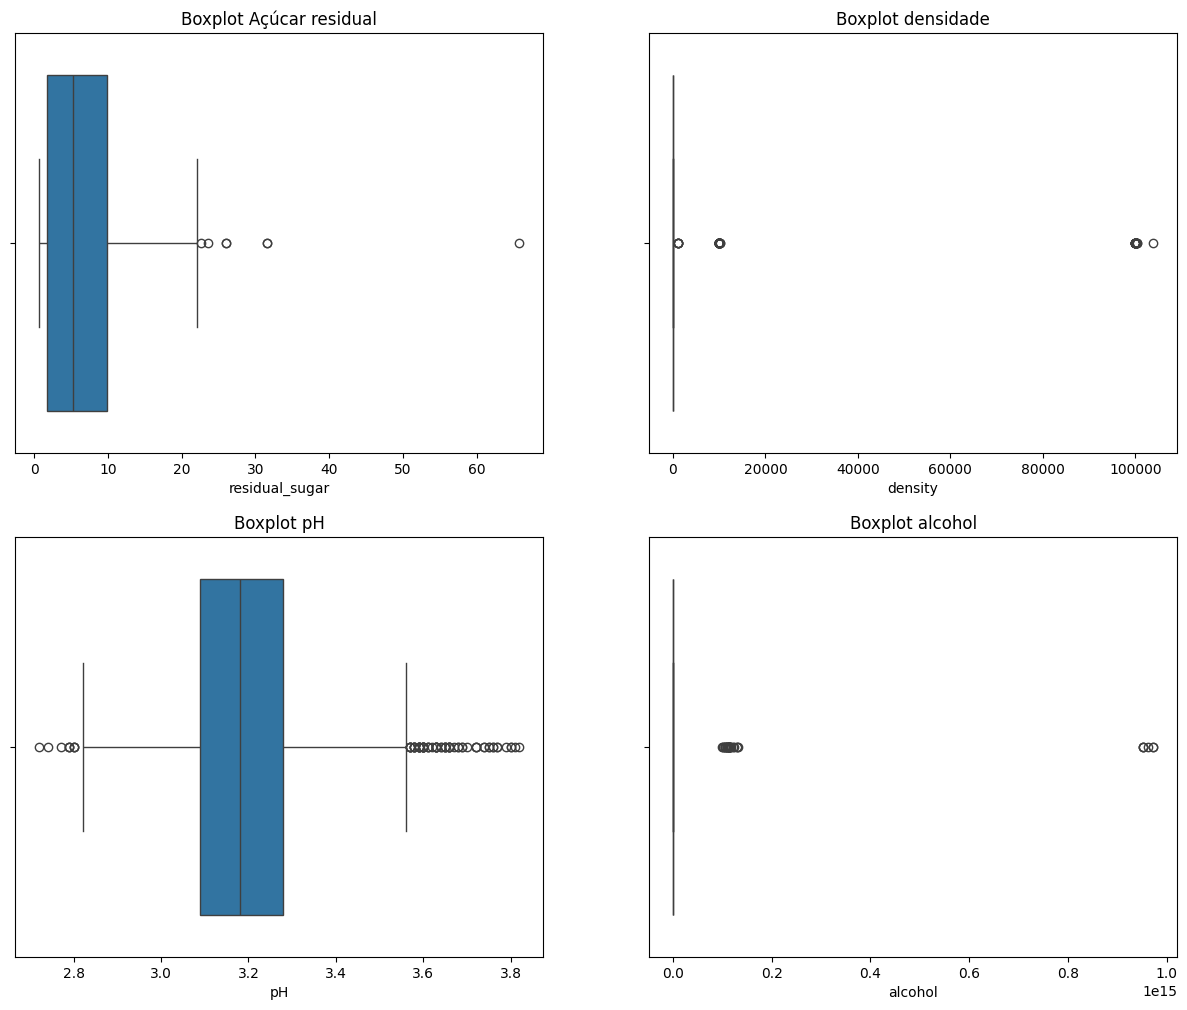

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(data=df, x="residual_sugar", ax=ax[0, 0])
ax[0, 0].set_title("Boxplot Açúcar residual")

sns.boxplot(data=df, x="density", ax=ax[0, 1])
ax[0, 1].set_title("Boxplot densidade")

sns.boxplot(data=df, x="pH", ax=ax[1,0])
ax[1,0].set_title("Boxplot pH")

sns.boxplot(data=df, x="alcohol", ax=ax[1,1])
ax[1,1].set_title("Boxplot alcohol")
plt.show()

# Item (A)
## Notamos que em alguns gráficos os outliers se tornam valores tão absurdos que certamente se tratam de um erro de medição, como no boxplot do álcool e da densidade
## As bases de dados com muito outliers ou com outliers extremos podem distorcer medidas estatísticas e levar a modelos com viés, prejudicando a generalização e a eficácia dos algoritmos que se baseam em distâncias ou médias, pois isso torna alguns valores absurdos. Os outliers podem causar overfitting e afetar o processo de normalização gerando resultados inferiores.

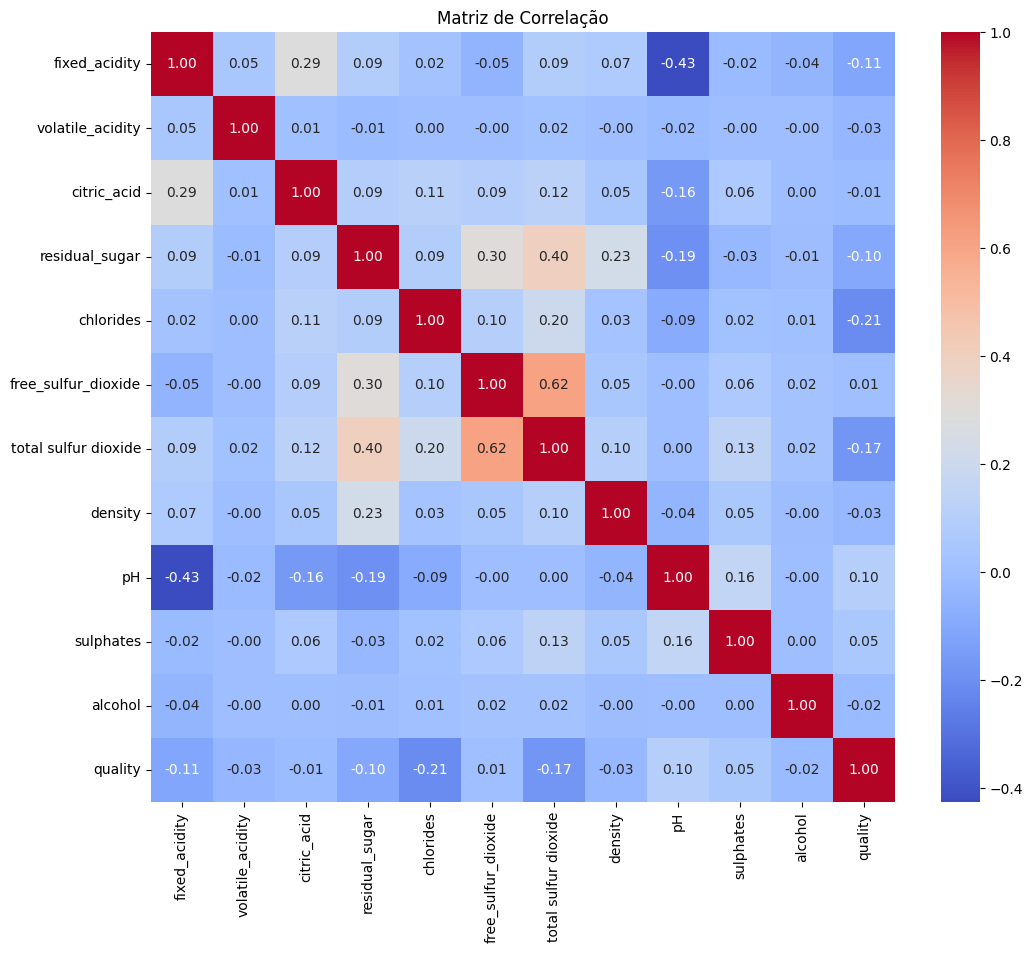

Correlação de cada atributo com a qualidade do vinho:
quality                 1.000000
pH                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
alcohol                -0.015277
density                -0.026099
volatile_acidity       -0.031648
residual_sugar         -0.097577
fixed_acidity          -0.113663
total sulfur dioxide   -0.174737
chlorides              -0.209934
Name: quality, dtype: float64


In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

corr_quality = corr_matrix['quality'].sort_values(ascending=False)
print("Correlação de cada atributo com a qualidade do vinho:")
print(corr_quality)

# Item (B)
## Os atributos não demonstram correlação com o atributo qualidade, o atributo chlorides tem maior correlação inversa com qualidade, valor ~= -0.21, e o atributo total sulfur dioxide, também tem a segunda maior correlação inversa ~= -0.17

In [20]:
colunas_normalizacao = ['pH', 'density']
coluna_padronizacao = ['alcohol']

minmax_scaler = MinMaxScaler()
df[colunas_normalizacao] = minmax_scaler.fit_transform(df[colunas_normalizacao])

standard_scaler = StandardScaler()
df[coluna_padronizacao] = standard_scaler.fit_transform(df[coluna_padronizacao])
df[['pH', 'density', 'alcohol']].sample(frac=1)



,pH,density,alcohol
1242,0.236364,4.514086e-08,-0.05257
2515,0.272727,2.820100e-08,-0.05257
2004,0.636364,6.727816e-08,-0.05257
1527,0.290909,7.979055e-08,-0.05257
946,0.218182,1.206964e-07,-0.05257
...,...,...,...
12,0.418182,4.706584e-08,-0.05257
600,0.354545,6.342820e-08,-0.05257
1511,0.272727,6.054072e-08,-0.05257
2997,0.272727,3.570844e-08,-0.05257


# Item (C)
## Na célula acima eu apliquei a normalização MinMaxScaler nas colunas pH e density e a padronização StandardScaler na coluna alcohol para demonstração do exercício
## A técnica de normalização e padronização é importante, pois muitos algorimtos de aprendizado de máquina são sensíveis a escala das variáveis. Alguns métodos como regressão logística e algoritmos baseados em distância (SVM e KNN) podem dar mais peso a atributos com valores numéricos maiores, distorcendo a importância real das variáveis. A normalização deixa os valores entre 0 e 1, enquanto a padronização deixa os valores com média 0 e desvio padrão 1